In [1]:
#Importo las librerias que me facilitaran el analisis e inferencia de datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px
from sklearn.model_selection import train_test_split
import math


In [2]:
# Cargo el archivo al notebook
from google.colab import drive
drive.mount('/content/drive')
df_info = pd.read_csv('/content/drive/MyDrive/games.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Investigo con que tipo de archivos voy a trabajar
print(df_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


# Preparación de Datos

In [4]:
#Empiezo a corregir ortografia en columnas y tipo de datos
df_info.columns = df_info.columns.str.lower().str.replace(' ', '_')
df_info

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
#Ahora corregimos los tipos de datos y transformamos al correcto
df_info['year_of_release'] = df_info['year_of_release'].fillna(0).astype(int)
df_info['user_score'] = pd.to_numeric(df_info['user_score'], errors='coerce')
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Se cambiaron el tipom de datos a las columnas: 'year_of_release' y 'user_score'.
Es cambio fue necesario ya que, no puede haber un año con decimales y al transfomrarlo en entero, nos aseguramos de ello y por otro lado con la columnas 'user_score' al tratarse de una representacion numerica, no la podriamos dejar como 'object' (texto).

In [6]:
#Ahora identificaremos los valores duplicados.
print(df_info.duplicated().sum())

0


In [7]:
#Ahora identificaremos los valores ausentes.
print(df_info.isnull().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


Observamos que en la columna 'nombre', hay 2 valores nulos, es decir no hya mucho problema, sin emabrgo, para las columna: 'critic_score', 'user_scor' y 'rating' encontramos un numero significante, por lo que debemos analizar independientemente cada columna y su distribucion para ver la mejor solucion.

In [8]:
#Al haber tan solo 2 datos de la comlumna 'name', decidimos eliminar esos registros.
df_info = df_info.dropna(subset=['name'])

#Comprobamos que ya no haya valores ausentes en la columna 'name'
print(df_info.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64


In [9]:
#Quiero observar las estadistica descriptiva de las columnas cuyo valores ausentes es mayor.
df_info[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,8137.000000,7590.000000
mean,68.967679,7.125046
std,13.938165,1.500006
min,13.000000,0.000000
25%,60.000000,6.400000
50%,71.000000,7.500000
75%,79.000000,8.200000
max,98.000000,9.700000


Observamos que los datos de 'critic_score' estan sumamente dispersos a diferencia de 'user_score' el cual los atos estan medianamente dispersons, por lo que yo recomendaria remplazar los valores ausentes on la media de esa misma columna.En cambio para la columna de 'critic_score' los remplazaremos con la mediana, ya que los datos estan mucho mas dispersos.

In [10]:
#Reemplazamos los valores ausentes respectivamente como mencionamos anteriormente.
df_info['critic_score'] = df_info['critic_score'].fillna(df_info['critic_score'].median())
df_info['user_score'] = df_info['user_score'].fillna(df_info['user_score'].mean())

#Comprobamos que ya no hayan valores nulos.
print(df_info.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64


<ipython-input-10-ab3e663b6dcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['critic_score'] = df_info['critic_score'].fillna(df_info['critic_score'].median())
<ipython-input-10-ab3e663b6dcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['user_score'] = df_info['user_score'].fillna(df_info['user_score'].mean())


In [11]:
#Por ulimo con la columna 'rating' al ser una columna de variables categoricas he decidido remplazar los valores nulos con la categoria 'Unknown'.
df_info['rating'] = df_info['rating'].fillna('Unknown')

#Comprobamos que ya no existan valores nulos.
print(df_info.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


<ipython-input-11-0496d9153ba4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['rating'] = df_info['rating'].fillna('Unknown')


Los datos estan listos para comenzar a realizar el analisis, sin embargo, primero quiero enriquecer el dataframe inicial para poder realizar y facilitar ciertas inferencias que podrian interesarnos para la campaña del proximo año.

In [12]:
#Es por esto que creamos un columna nueva que englobe la suma d eventas de cada region.

df_info['total_sales'] = df_info[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


<ipython-input-12-4fc65af76431>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['total_sales'] = df_info[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


Ahora los datos estan 100 listos para comenzar su manipulacion e inferencia estadistica.

# Analisis de Datos


In [13]:
juegos_por_ano = df_info.groupby('year_of_release').agg(
    cantidad_juegos=('name', 'count'),
    total_sales=('total_sales', 'sum')
).reset_index()
juegos_por_ano

,year_of_release,cantidad_juegos,total_sales
0,0,269,98.92
1,1980,9,11.38
2,1981,46,35.68
3,1982,36,28.88
4,1983,17,16.80
5,1984,14,50.35
6,1985,14,53.95
7,1986,21,37.08
8,1987,16,21.70
9,1988,15,47.21


Me doy cuenta que existen 269 datos cuyo año de lanzamiento es 0, eso es imposible asi que debemos corregirlo o esto afectara a nuestro analisis.

In [14]:
#Eliminamos los 269 dregistros del total de 16715, ya que estos no tienen
# informacion de año y al representar menos del 2% del total del
# datos, no afectara en nuestra inferencia de datos y conclusiones.
df_info = df_info[df_info['year_of_release'] != 0]

#Ahora si realizamos el filtro
juegos_por_ano = df_info.groupby('year_of_release').agg(
    cantidad_juegos=('name', 'count'),
    total_sales=('total_sales', 'sum')
).reset_index()
juegos_por_ano

,year_of_release,cantidad_juegos,total_sales
0,1980,9,11.38
1,1981,46,35.68
2,1982,36,28.88
3,1983,17,16.80
4,1984,14,50.35
5,1985,14,53.95
6,1986,21,37.08
7,1987,16,21.70
8,1988,15,47.21
9,1989,17,73.45


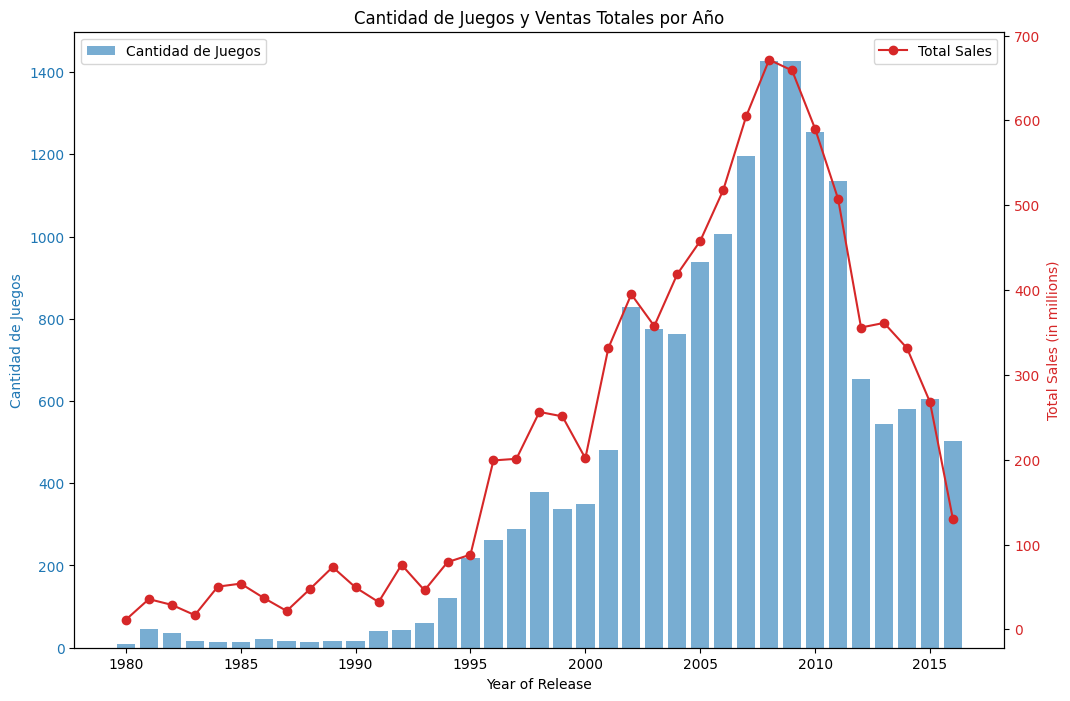

In [15]:
# Crear gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje X
ax1.set_xlabel('Year of Release')

# Eje Y para cantidad de juegos
ax1.set_ylabel('Cantidad de Juegos', color='tab:blue')
ax1.bar(juegos_por_ano['year_of_release'], juegos_por_ano['cantidad_juegos'], color='tab:blue', alpha=0.6, label='Cantidad de Juegos')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Eje Y2 para total de ventas
ax2 = ax1.twinx()
ax2.set_ylabel('Total Sales (in millions)', color='tab:red')
ax2.plot(juegos_por_ano['year_of_release'], juegos_por_ano['total_sales'], color='tab:red', marker='o', label='Total Sales')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título y leyendas
plt.title('Cantidad de Juegos y Ventas Totales por Año')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Podemos observarcomo a venido ascendiendo la cantidad de juegos que salen por año. De igual forma la cantidad de ventas que se ha tenido en cada año y como esta ha empezado a disminuir a partir del año 2008.
El mejor año tanto para salida de videojuegos como venta de los mismos fue el año 2008.

In [16]:
#Ahora analizaremos cantidad de juegos lanzados por año y de igual forma su cantidad de ventas por plataforma.

ventas_por_plataforma = df_info.groupby('platform').agg(
    cantidad_juegos=('name', 'count'),
    total_sales=('total_sales', 'sum')
).reset_index()
ventas_por_plataforma

,platform,cantidad_juegos,total_sales
0,2600,116,86.48
1,3DO,3,0.10
2,3DS,512,257.81
3,DC,52,15.95
4,DS,2121,802.78
5,GB,97,254.43
6,GBA,811,312.88
7,GC,542,196.73
8,GEN,27,28.35
9,GG,1,0.04


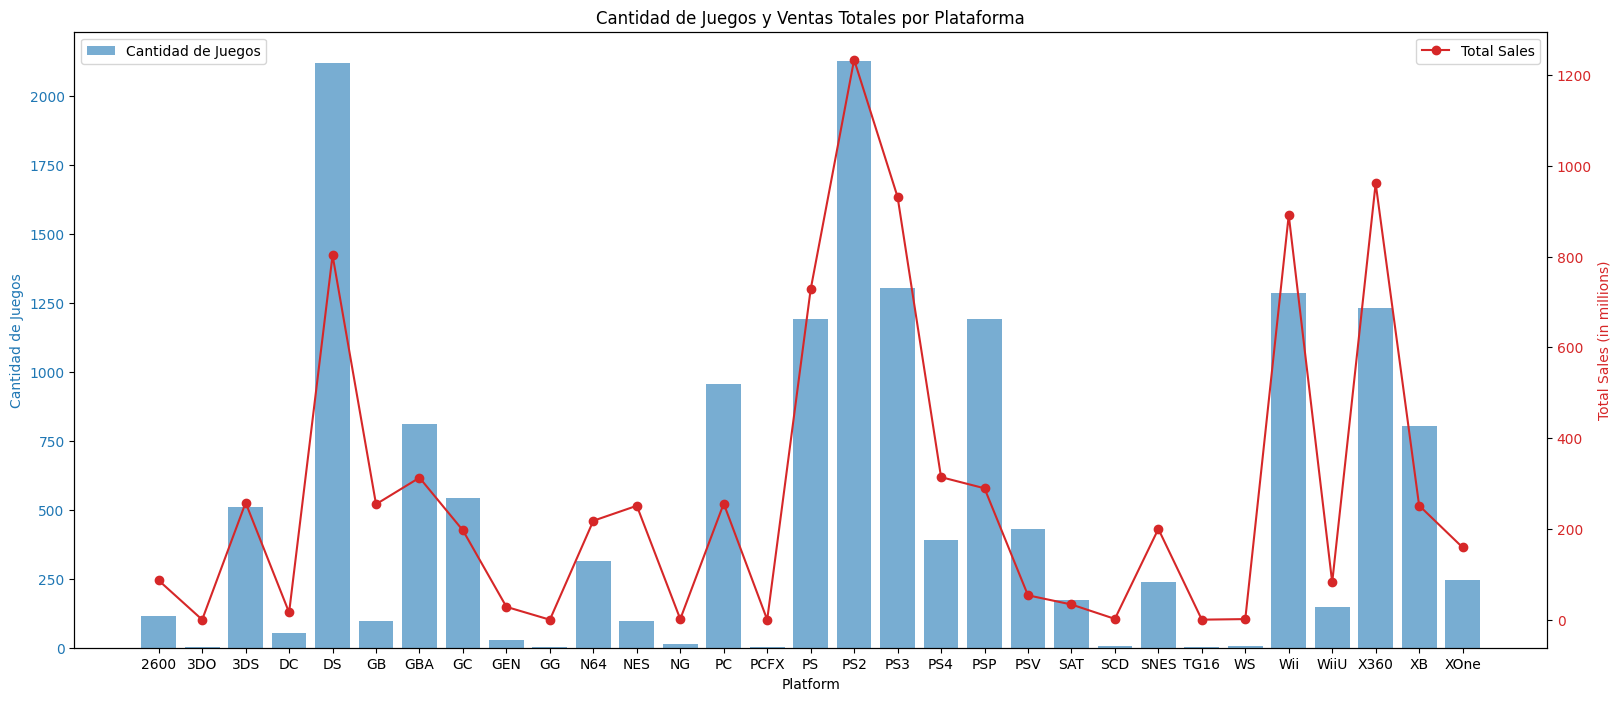

In [17]:


# Crear gráfico de barras
fig, ax1 = plt.subplots(figsize=(19, 8))

# Eje X
ax1.set_xlabel('Platform')

# Eje Y para cantidad de juegos
ax1.set_ylabel('Cantidad de Juegos', color='tab:blue')
ax1.bar(ventas_por_plataforma['platform'], ventas_por_plataforma['cantidad_juegos'], color='tab:blue', alpha=0.6, label='Cantidad de Juegos')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Eje Y2 para total de ventas
ax2 = ax1.twinx()
ax2.set_ylabel('Total Sales (in millions)', color='tab:red')
ax2.plot(ventas_por_plataforma['platform'], ventas_por_plataforma['total_sales'], color='tab:red', marker='o', label='Total Sales')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título y leyendas
plt.title('Cantidad de Juegos y Ventas Totales por Plataforma')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Observamos que el nintendo DS y el PS2 fueron las plataformas que mas juego lanzaron al mercado, sin embargo, la plataforma que mas ventas alcanzo fue la PS2

In [18]:
#Realizaremos un filtro en orden descendente para tener claro cuales son las plataformas mas robustas
ventas_por_plataforma.sort_values(by='cantidad_juegos', ascending=False).reset_index()

,index,platform,cantidad_juegos,total_sales
0,16,PS2,2127,1233.56
1,4,DS,2121,802.78
2,17,PS3,1306,931.34
3,26,Wii,1286,891.18
4,28,X360,1232,961.24
5,19,PSP,1193,289.53
6,15,PS,1190,727.58
7,13,PC,957,255.76
8,6,GBA,811,312.88
9,29,XB,803,251.57


Ahora sabemos las plataformas con mayor cantidad de datos

# Analisis significativo
Ahora realizaremos contunuaremos con nuestro analisis, sin embargo, para ello solo selecionaremos los datos mas robustos, es decir, los que mayor cantidad de datos disponen. Para ello nos basaremos en la primera grafica del comportamiento de videojuegos en los años donde observamos que a partir del año 2000 a la actualidad disponmos de mas datos.

In [19]:
#Filtramos nuestro dataframe original

datos_relevantes = df_info[df_info['year_of_release'] >= 2000]
datos_relevantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14470 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     14470 non-null  float64
 9   user_score       14470 non-null  float64
 10  rating           14470 non-null  object 
 11  total_sales      14470 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


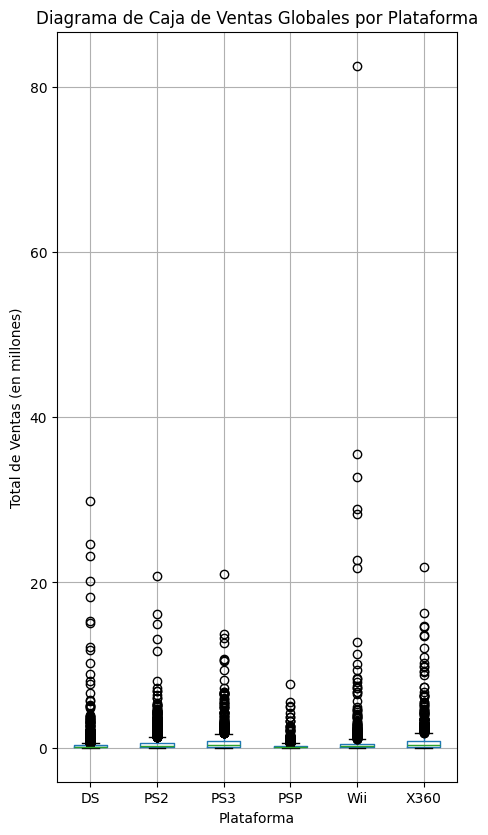

In [20]:
# Filtramos las plataformas mas relevantes
best_plataforms = datos_relevantes[datos_relevantes['platform'].isin(['PS2', 'DS', 'PS3','Wii','X360', 'PSP'])]

# Create a boxplot
best_plataforms.boxplot(column='total_sales', by='platform', figsize=(5, 10))
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Total de Ventas (en millones)')
plt.suptitle('')
plt.show()


Observamos la distibucion de los datos en ventas de cada plataforma donde se nota que los datos de la compania Nintendo que produce al DS y al Wii, tiene una mayor dispercion en sus datos a diferenia de la compañia SONY que sus datos son  muchos mas constantes

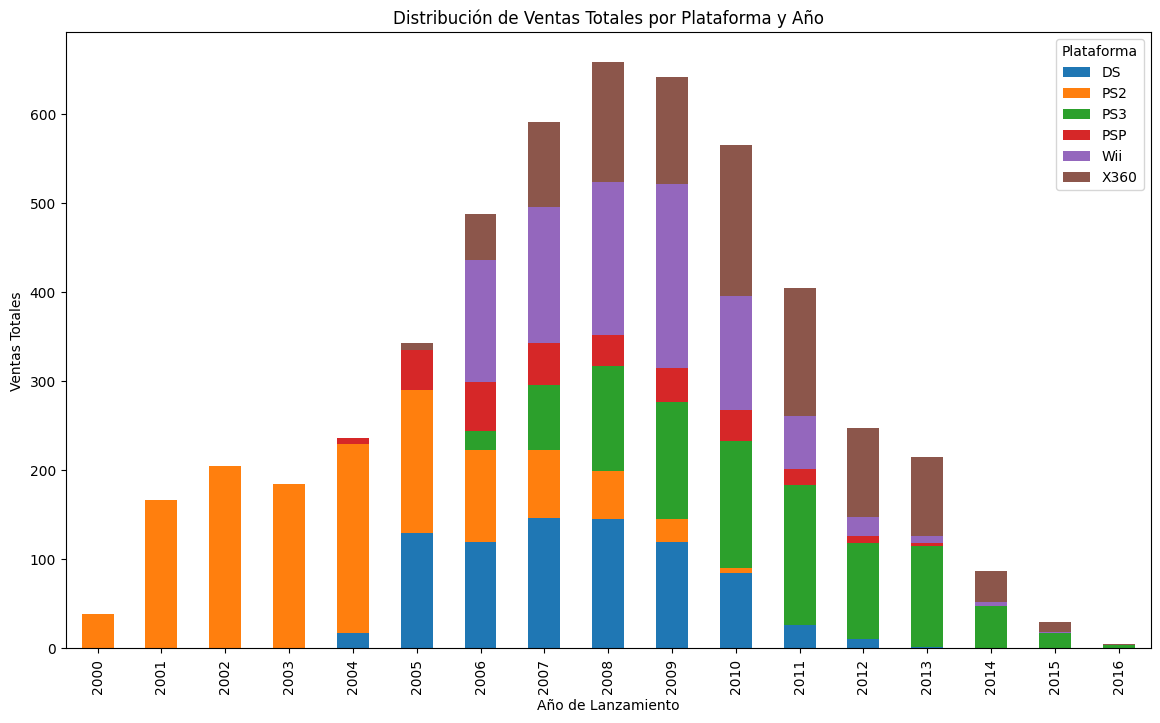

In [21]:
# Agrupamos por plataforma y año de lanzamiento y sumar las ventas totales
platform_sales_per_year = best_plataforms.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

platform_sales_per_year.T.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribución de Ventas Totales por Plataforma y Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.legend(title='Plataforma')
plt.show()


Este grafico nos permite observar como con el paso dle timpo van pasando de modas las distintas plataformas. a partir del 2000 hasta el 2005 el PS2 predomino en ventas, sin embargo, despues el Nintendo Wii toma el relevo y domina los siguientes años hasta el 2010.
Podemos determinar que el PS2, PSP, DS ya no son populares y tienen ventas casi nulas al llegar al año 2011.

Yo diria que cada plataforma tiene un promedio de popularidad de 6-7 años en el mercado, despues de este tiempo sus ventas disminuyen o incluso se extinguen.

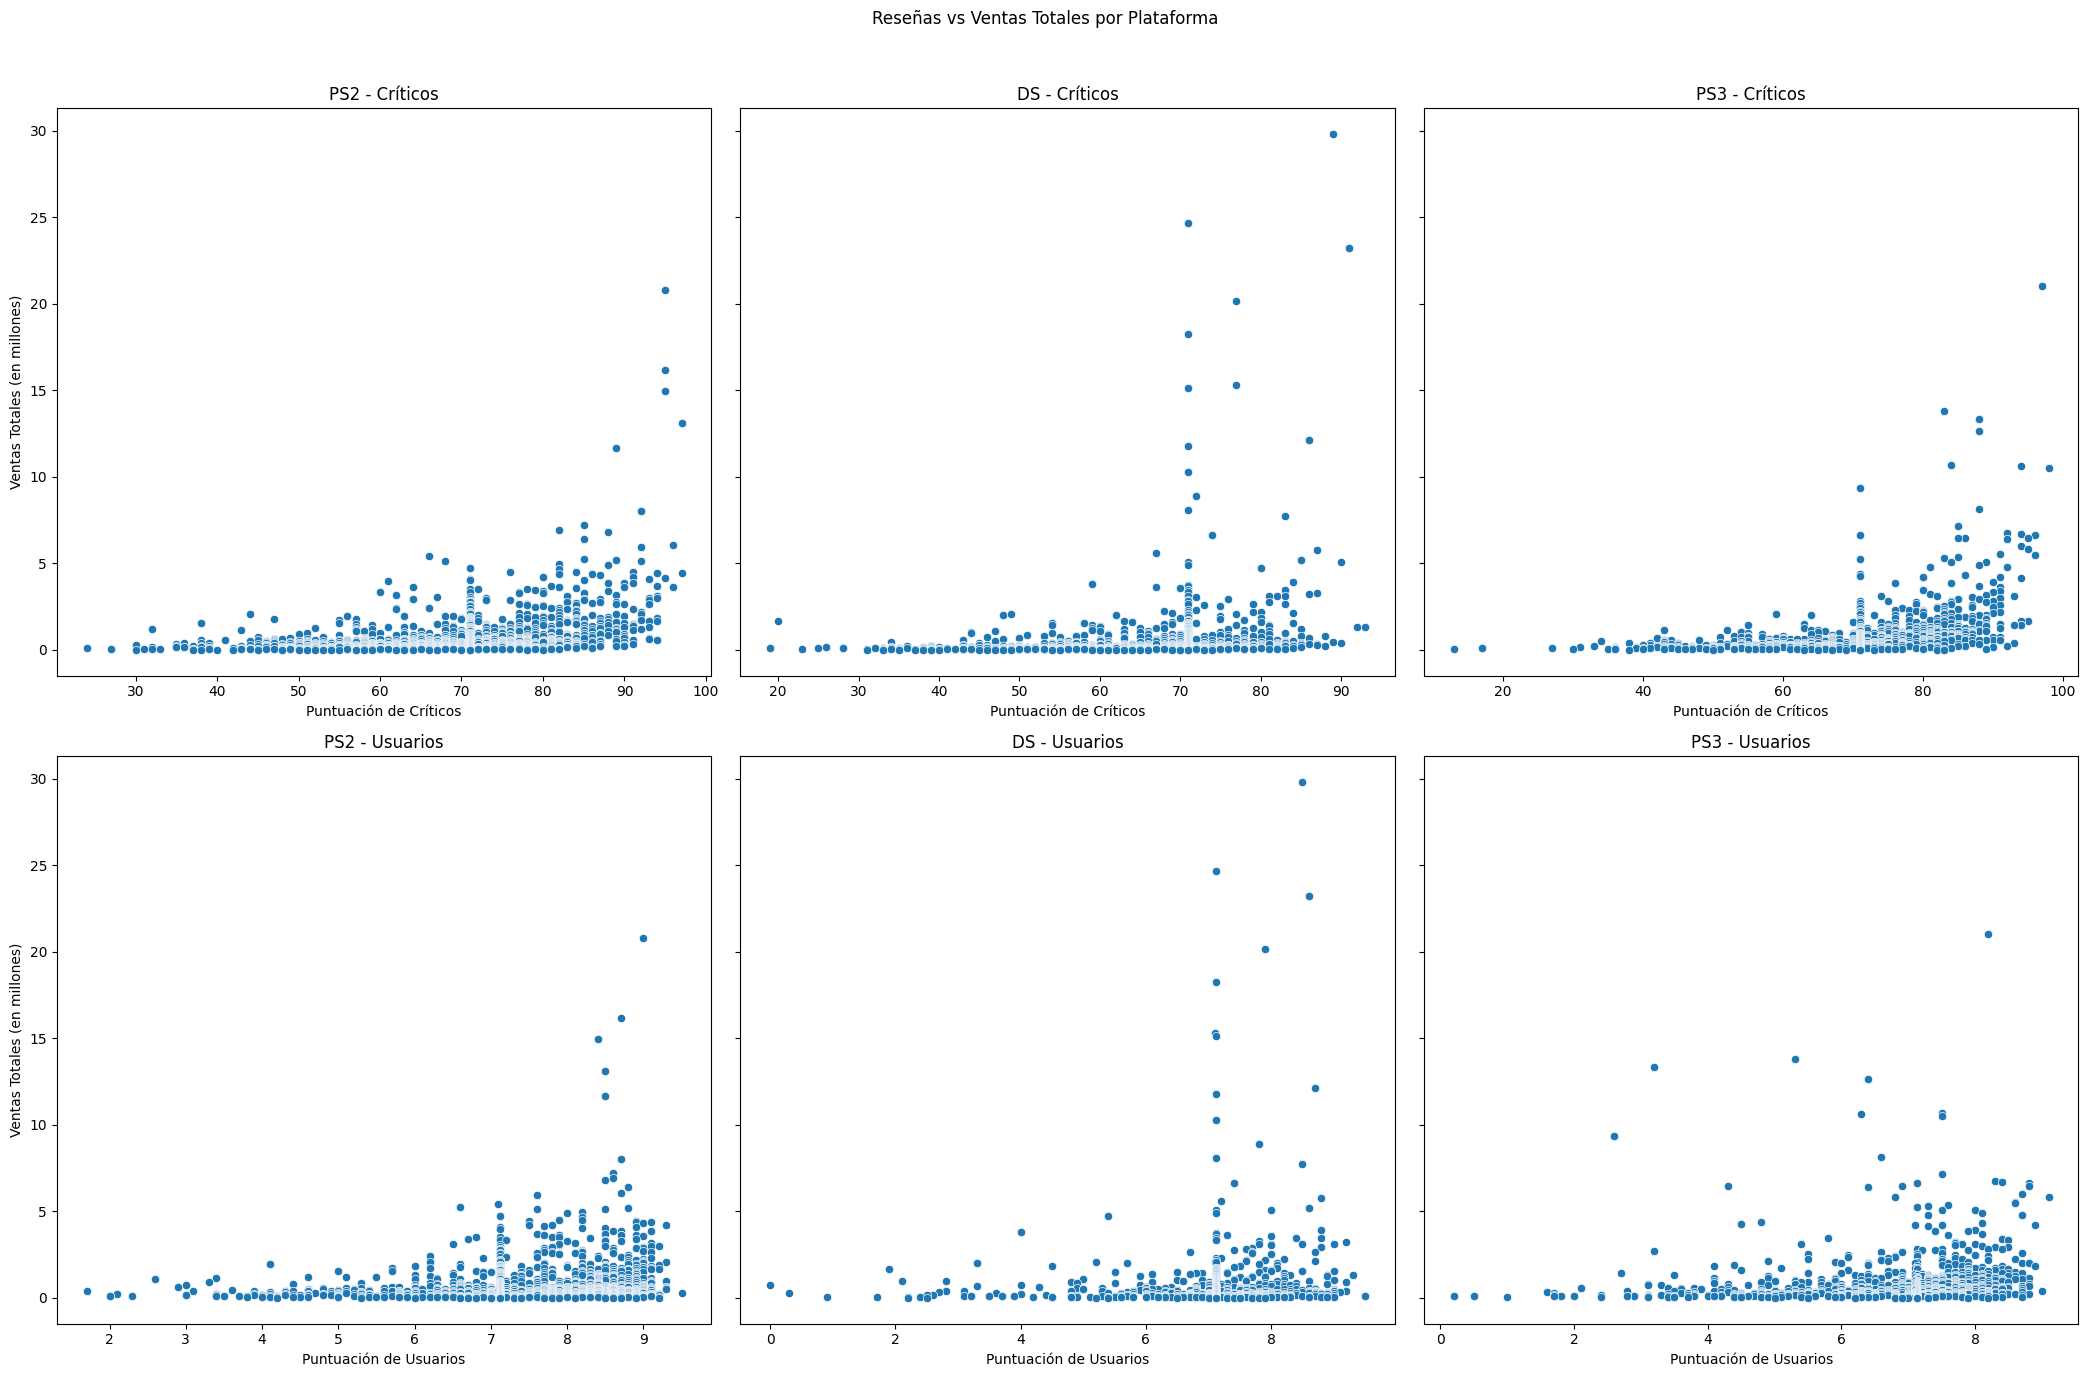

Correlación entre las reseñas de críticos y las ventas: 0.22
Correlación entre las reseñas de usuarios y las ventas: 0.09


In [23]:
# Filtrar los datos para las 3 plataformas con más ventas y mayor cantidad de datos
ps2_data = best_plataforms[best_plataforms['platform'] == 'PS2']
ds_data = best_plataforms[best_plataforms['platform'] == 'DS']
ps3_data = best_plataforms[best_plataforms['platform'] == 'PS3']

# Graficamos las correlaciones para crticos vs ventas de cada plataforma y despues de usuarios vs  ventas de cada plataforma
fig, axes = plt.subplots(2, 3, figsize=(21, 14), sharey=True)

# Gráficos de dispersión para reseñas de críticos vs ventas totales
sns.scatterplot(data=ps2_data, x='critic_score', y='total_sales', ax=axes[0, 0])
axes[0, 0].set_title('PS2 - Críticos')
axes[0, 0].set_xlabel('Puntuación de Críticos')
axes[0, 0].set_ylabel('Ventas Totales (en millones)')

sns.scatterplot(data=ds_data, x='critic_score', y='total_sales', ax=axes[0, 1])
axes[0, 1].set_title('DS - Críticos')
axes[0, 1].set_xlabel('Puntuación de Críticos')
axes[0, 1].set_ylabel('')

sns.scatterplot(data=ps3_data, x='critic_score', y='total_sales', ax=axes[0, 2])
axes[0, 2].set_title('PS3 - Críticos')
axes[0, 2].set_xlabel('Puntuación de Críticos')
axes[0, 2].set_ylabel('')

# Gráficos de dispersión para reseñas de usuarios vs ventas totales
sns.scatterplot(data=ps2_data, x='user_score', y='total_sales', ax=axes[1, 0])
axes[1, 0].set_title('PS2 - Usuarios')
axes[1, 0].set_xlabel('Puntuación de Usuarios')
axes[1, 0].set_ylabel('Ventas Totales (en millones)')

sns.scatterplot(data=ds_data, x='user_score', y='total_sales', ax=axes[1, 1])
axes[1, 1].set_title('DS - Usuarios')
axes[1, 1].set_xlabel('Puntuación de Usuarios')
axes[1, 1].set_ylabel('')

sns.scatterplot(data=ps3_data, x='user_score', y='total_sales', ax=axes[1, 2])
axes[1, 2].set_title('PS3 - Usuarios')
axes[1, 2].set_xlabel('Puntuación de Usuarios')
axes[1, 2].set_ylabel('')

# Ajustar el layout y mostrar el gráfico
plt.suptitle('Reseñas vs Ventas Totales por Plataforma')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Calcular las correlaciones (suponiendo que `ps4_data` ya está definido)
critic_corr = best_plataforms['critic_score'].corr(best_plataforms['total_sales'])
user_corr = best_plataforms['user_score'].corr(best_plataforms['total_sales'])

print(f"Correlación entre las reseñas de críticos y las ventas: {critic_corr:.2f}")
print(f"Correlación entre las reseñas de usuarios y las ventas: {user_corr:.2f}")


Si bien los graficos nos ayudan a interpretar el resultado, no hya gran iferencia en la dispercion de datos o patron. Es por esto que he decidido calcular la coorelacion numerica y aqui si podemos concluir que:
  - Correlación entre las reseñas de críticos y las ventas: 0.22. Es decir que la reseña de criticos si tiene una pequeña correlacion positiva en cuando a las ventas, es decir, a mejor reseña tenga el juego por los criticos, mejores ventas tendra.

  - Correlación entre las reseñas de usuarios y las ventas: 0.09. Aqui podemos ver uqe la relacion entre ambas es casi nula,  por lo que podemos decir que las reseñas de usuairios no afecta las ventas de la plataforma.

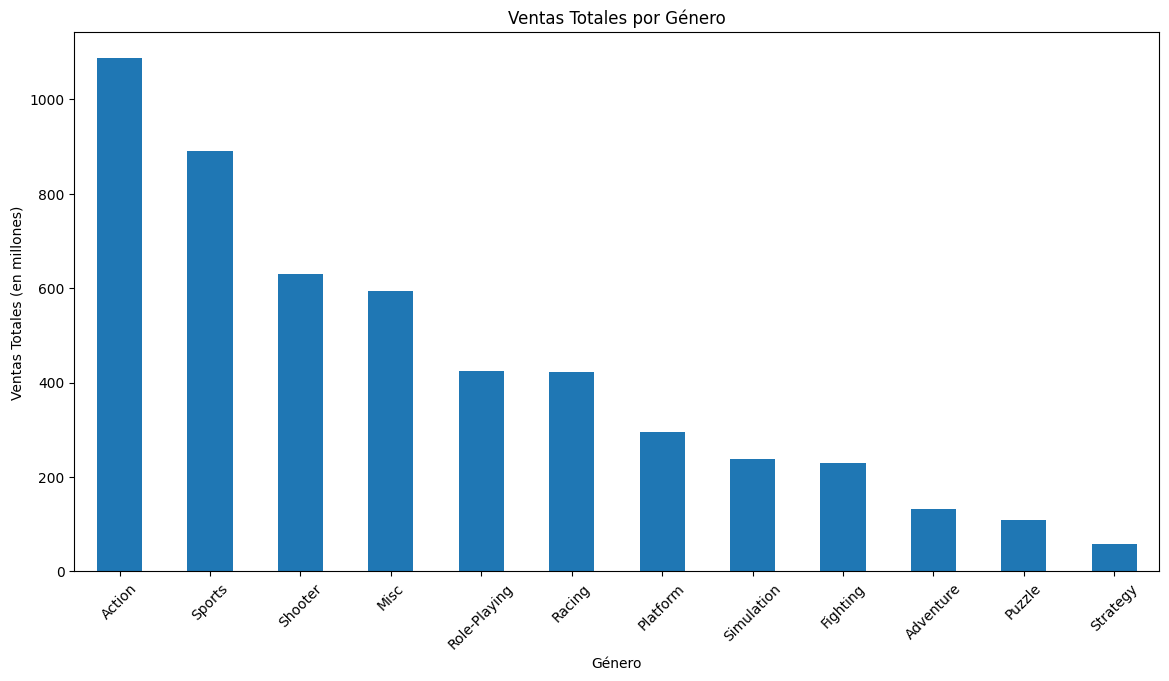

In [24]:
# Ahora filtraremos por genero para ver si hay una tendencia
genre_sales = best_plataforms.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crear el gráfico
plt.figure(figsize=(14, 7))
genre_sales.plot(kind='bar')
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.show()



Notamos que el genero de accion, sports y Shooter son las 3 a¿categorias que generan mayor ventas a las distintas plataformas.

<Figure size 1400x700 with 0 Axes>

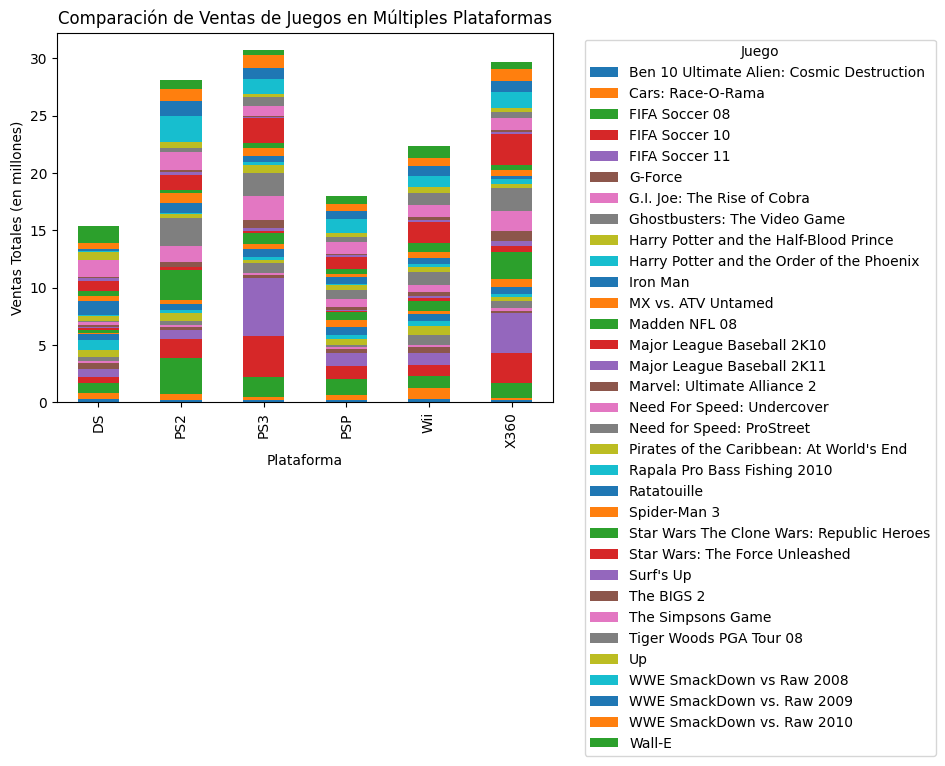

In [25]:

# Lista de todas las plataformas mas importantes
all_platforms = ['PS2', 'DS', 'PS3','Wii','X360', 'PSP']

# Filtrar los juegos que esten disponibles en toas las plataformas especificadas
multi_platform_games = best_plataforms.groupby('name').filter(lambda x: set(all_platforms).issubset(x['platform'].unique()))

# Agrupar por nombre del juego y plataforma y sumar las ventas totales
multi_platform_sales = multi_platform_games.groupby(['name', 'platform'])['total_sales'].sum().unstack()

plt.figure(figsize=(14, 7))
multi_platform_sales.T.plot(kind='bar', stacked=True)
plt.title('Comparación de Ventas de Juegos en Múltiples Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Juego', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Observamos que la platafora PS3 y XBOX360 son las plataformas que mayor cantidad de ventas totales tienen.

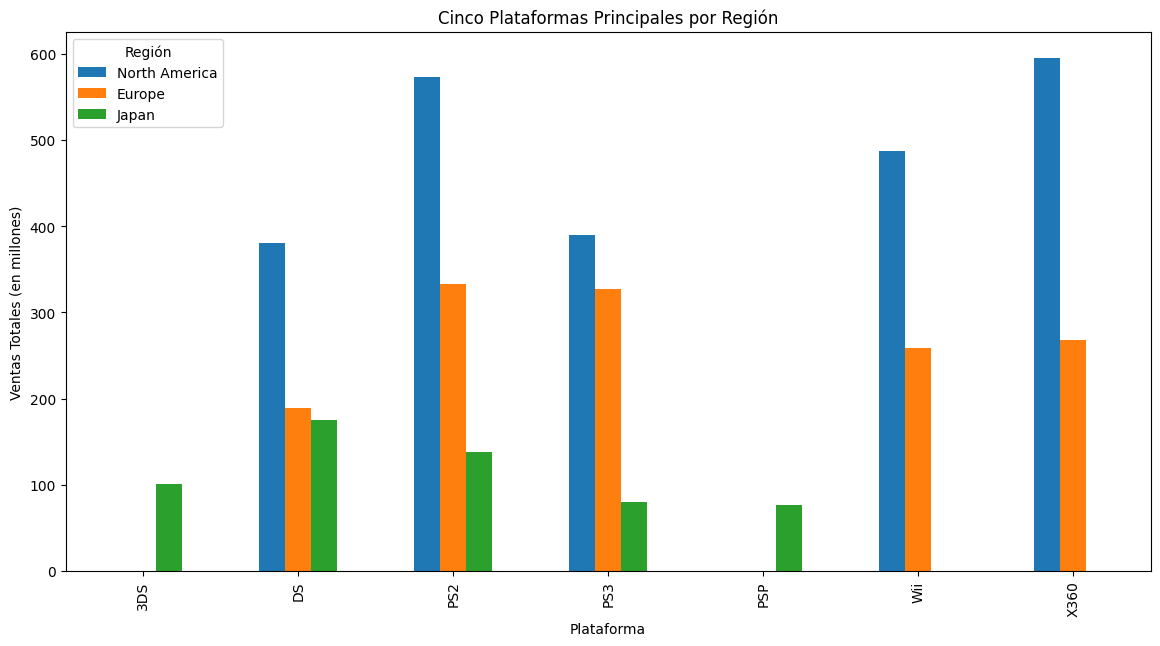

In [26]:
# Crearemos un perfil para cada region y asi poder comparar las vebtas por plataforma
na_sales = datos_relevantes.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_sales = datos_relevantes.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_sales = datos_relevantes.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Crear DataFrame para visualización
regions_sales = pd.DataFrame({
    'North America': na_sales,
    'Europe': eu_sales,
    'Japan': jp_sales
})

# Crear gráfico de barras
regions_sales.plot(kind='bar', figsize=(14, 7))
plt.title('Cinco Plataformas Principales por Región')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Región')
plt.show()


Observamos que Norte America supera significativamente a las demas regiones en la mayoria de plataformas, despues viene Europa y por ultimo Japan, cuyas ventas son menores a las demas regiones sin embargo en las plataformas 3DS y PSP es la unica region que realizo ventas significativas.

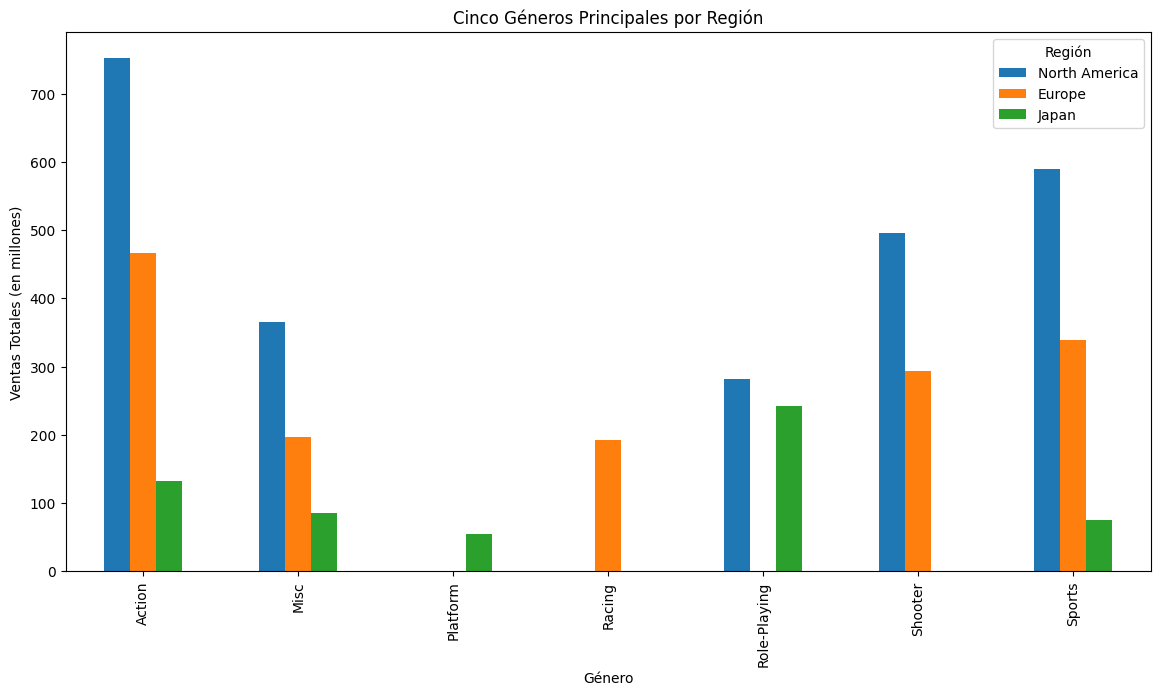

In [27]:
# Calcular ventas totales por género para cada región
na_genre_sales = datos_relevantes.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genre_sales = datos_relevantes.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genre_sales = datos_relevantes.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Crear DataFrame para visualización
genres_sales = pd.DataFrame({
    'North America': na_genre_sales,
    'Europe': eu_genre_sales,
    'Japan': jp_genre_sales
})

# Crear gráfico de barras
genres_sales.plot(kind='bar', figsize=(14, 7))
plt.title('Cinco Géneros Principales por Región')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Región')
plt.show()


Observamos que el genero predominante para Norte America y Europa es accion, seguido de deportes, sin embargo, para Japon predomina el genero de Role Playing  y no consumen el genero de Shooter.

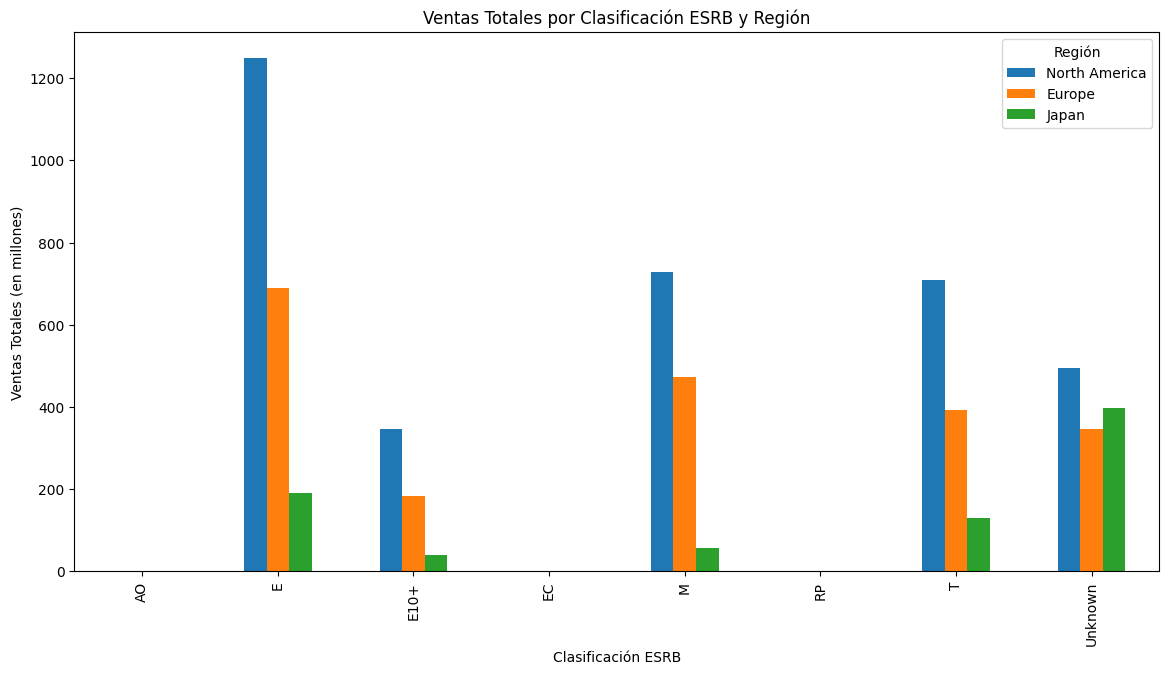

In [28]:
# Calcular ventas totales por clasificación ESRB para cada región
na_esrb_sales = datos_relevantes.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_esrb_sales = datos_relevantes.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_esrb_sales = datos_relevantes.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Crear DataFrame para visualización
esrb_sales = pd.DataFrame({
    'North America': na_esrb_sales,
    'Europe': eu_esrb_sales,
    'Japan': jp_esrb_sales
})

# Crear gráfico de barras
esrb_sales.plot(kind='bar', figsize=(14, 7))
plt.title('Ventas Totales por Clasificación ESRB y Región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Región')
plt.show()


En el ranking de ESBR, donde cada categoria significa:
- E (Todos): Contenido adecuado para todas las edades.
- E10 (Todos +10): Contenido adecuado para mayores de 10 años.
- T (Adolescentes): Contenido adecuado para mayores de 13 años.
- M (Maduro): Contenido adecuado para mayores de 17 años.
- AO (Adultos únicamente): Contenido al que solo deben jugar mayores de 18 años.
- EC indica que un juego es adecuado para niños pequeños de tres años en adelante.
- RP significa que un videojuego está pendiente de una clasificación final

Denotamos que en las tres regiones predomina la categoria E, ya que es la que mayor mercado tiene por las condiciones establecidas.

# Comprobacion de supuestos estadisticos
### 1er Test
Realizaremos una comparacion entre las plataformas de Xbox One y PC, ambas de la compania Microsoft y queremos determinar estadisticamente si las calificaciones de usuarios difieren significativamente. Es decir si los usuarios de cada plataforma estan mas contentos con una plataforma en especifico.

Entonces:
  - H₀: No existe diferencia entre las calificaciones de usuarios entre Xbox ONe y PC. (H₀: μ₁ = μ₂)
  - H₁: Existe una diferencia entre las calificaciones de usuarios entre Xbox ONe y PC. (H₁: μ₁ ≠ μ₂)

In [29]:
# Ahora filtramos los datos de Xbox One y PC
xbox_data = datos_relevantes[datos_relevantes['platform'] == 'XOne']
pc_data = datos_relevantes[datos_relevantes['platform'] == 'PC']

# Obtener las calificaciones de usuario para ambas plataformas
xbox_user_scores = xbox_data['user_score'].dropna()
pc_user_scores = pc_data['user_score'].dropna()

# Establecemos el nivel de confianza de 99%, ya que tenemos una muestra grande
alpha = 0.01  # Nivel de significancia

# Realizar una prueba t de dos muestras independientes
resultados = st.ttest_ind(xbox_user_scores, pc_user_scores, equal_var = False)

# Imprimir el valor p
print('Valor p:', resultados.pvalue)

# Comparar el valor p con el umbral
if resultados.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 3.824054711989308e-05
Rechazamos la hipótesis nula


Es decir que la diferencia de calificaciones por los usuarios de cada plataforma no es igual estadisticamente, por ende los usuarios difieren de la plataforma.

### 2do Test

Realizaremos una comparacion entre las calificaciones promedio del genero Acion y Deporte. Queremos determinar estadisticamente si las calificaciones de usuarios difieren significativamente. Es decir si los usuarios prefieren una categoria  de genero que la otra.

In [30]:
# Filtrar los datos para los géneros de Acción y Deportes
action_data = datos_relevantes[datos_relevantes['genre'] == 'Action']
sports_data = datos_relevantes[datos_relevantes['genre'] == 'Sports']

# Obtener las calificaciones de usuario para ambos géneros
action_user_scores = action_data['user_score'].dropna()
sports_user_scores = sports_data['user_score'].dropna()

# Establecemos el nivel de confianza de 99%, ya que tenemos una muestra grande
alpha = 0.01  # Nivel de significancia

# Realizar una prueba t de dos muestras independientes
resultados = st.ttest_ind(action_user_scores, sports_user_scores, equal_var = False)

# Imprimir el valor p
print('Valor p:', resultados.pvalue)

# Comparar el valor p con el umbral
if resultados.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p: 0.12710242210002132
No podemos rechazar la hipótesis nula


In [31]:
# Filtrar los datos para los géneros de Acción y Deportes
cantidad = ventas_por_plataforma['cantidad_juegos']
ventas = ventas_por_plataforma['total_sales']


games_vs_sales_corr = cantidad.corr(ventas)

print(f"Correlación entre las cantidad de juegos vs la cantidad de ventas por plataforma: {games_vs_sales_corr:.2f}")

Correlación entre las cantidad de juegos vs la cantidad de ventas por plataforma: 0.90


Esta correlacion nos indica que existe una fuerte relacion entre la cantidad de juegos que hay para cada plataforma con respecto a la venta que esta plataforma realice.

# Conclusiones:

En base a los analisis realizados podemos concluir que:
- Las reseñas de criticos calificados tienen una coorelacion pequeña, pero positiva con respecto a las ventas alcanzadas. Es decir, que en furutas campañas se debe priorizar una buena expericncia para los criticos y que estos califiquen correctamente el juego.
- El mercado mas amplio para la venta de videojuegos es en Norte America, seguido por europa y sorprendentemente en Japon las ventas de videojuegos nos son muy elevadas.
- El auge o epoca dorada de videojuegos fue del 2000 al 2012 aproximadamente.
- Una plataforma tiene en promedio como vida util, es decir un intervalo en el que las ventas son muy buenas de 6 y 7 años, posterior a este empiezan a decrecer.
- Existe fuerte relacion positiva con el numero de juegos que tenga cada plataforma, para el numero de ventas que realice esa plataforma. Por lo que si se piensa lanzar una plataforma, esta debe estar respaldada por un buen portafolio de juegos que maximice el exito que esta llegara a tener.
- Si bien no existe diferencia significativa de calificaciones entre genero, los generos mas vendidos son accion y de deportes. Para una futura campaña priorizar la creacion de videojuegos con esas categorias.